In [1]:
import matplotlib.pyplot as plt
import numpy as np
from muca.model.p_body_ising import PBodyTwoDimIsing
from muca.algorithm.wang_landau import WangLandau
from muca.algorithm.parameters import WangLandauParameters
from muca.results.analysis import Analyzer

In [2]:
p = 4
L = 8
S = 1.5

In [3]:
model = PBodyTwoDimIsing(J=-1, p=p, Lx=L, Ly=L, spin=S, spin_scale_factor=1/S)

In [4]:
result_normal = WangLandau.run(
    model=model,
    parameters=WangLandauParameters(
        modification_criterion=1e-08,
        convergence_check_interval=100,
        num_divided_energy_range=1,
        overlap_rate = 0.4,
        flatness_criterion = 0.9,
    ),
    calculate_order_parameters=False,
    backend = "cpp"
)

Running Wang-Landau simulation by cpp ...
Done simulation (223.8) [sec] by cpp


In [5]:
result_symm = WangLandau.run(
    model=model,
    parameters=WangLandauParameters(
        modification_criterion=1e-08,
        convergence_check_interval=100,
        num_divided_energy_range=1,
        overlap_rate = 0.4,
        flatness_criterion = 0.9,
    ),
    calculate_order_parameters=False,
    backend = "cpp",
    symmetric_calculation=True,
)

Running symmetric Wang-Landau simulation by cpp ...
Done simulation (71.4) [sec] by cpp


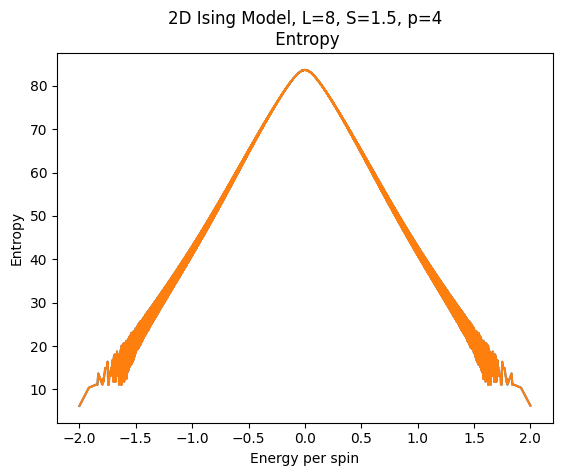

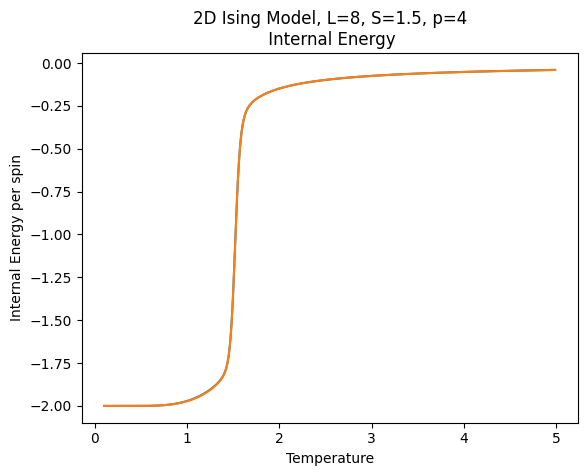

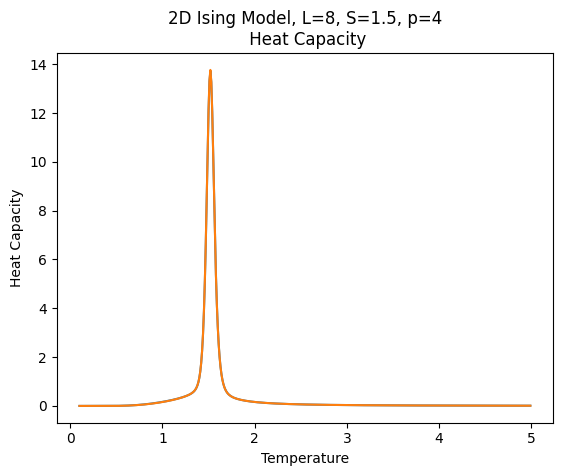

In [7]:
N = result_normal.model.Lx*result_normal.model.Ly
plt.title(f"2D Ising Model, L={L}, S={S}, p={p}\n Entropy")
plt.plot(result_normal.energies/N, result_normal.entropies)
plt.plot(result_symm.energies/N, result_symm.entropies)
plt.xlabel("Energy per spin")
plt.ylabel("Entropy")
plt.show()

temperature = np.arange(0.1, 5, 0.01)
plt.title(f"2D Ising Model, L={L}, S={S}, p={p}\n Internal Energy")
u1 = Analyzer.calculate_expectation(result_normal.energies, result_normal.entropies, temperature, result_normal.energies)/N
u2 = Analyzer.calculate_expectation(result_symm.energies, result_symm.entropies, temperature, result_symm.energies)/N
plt.plot(temperature, u1)
plt.plot(temperature, u2)
plt.xlabel("Temperature")
plt.ylabel("Internal Energy per spin")
plt.show()

plt.title(f"2D Ising Model, L={L}, S={S}, p={p}\n Heat Capacity")
c1 = Analyzer.calculate_heat_capacity(result_normal.energies, result_normal.entropies, temperature)/N
c2 = Analyzer.calculate_heat_capacity(result_symm.energies, result_symm.entropies, temperature)/N
plt.plot(temperature, c1)
plt.plot(temperature, c2)
plt.xlabel("Temperature")
plt.ylabel("Heat Capacity")
plt.show()